# Importing Libraries

In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Merging Data

In [2]:
schools = ["Vidya Mandir", "St. Joseph", "DPS", "Birla HS", "International"]

def load_data(path, year):
    sheets_dict = pd.read_excel(path, sheet_name = schools, engine = 'openpyxl')
    df_list=[]
    for school_name, df in sheets_dict.items():
        df["School"] = school_name
        df["year"] = year
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

df_2019 = load_data("Bangalore Schools 2019.xlsx", 2019)
df_2020 = load_data("Bangalore Schools 2020.xlsx", 2020)
df_2021 = load_data("Bangalore Schools 2021.xlsx", 2021)

# Combine all years into a single DataFrame
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

# Display the first few rows
df_all_years.head(25)


,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education,School,year
0,1001,Akash Ahuja,30,95,78,92,84,36,47,82,44,14,74,Vidya Mandir,2019
1,1002,Mohit Srivatsav,32,46,65,53,28,77,36,76,74,77,27,Vidya Mandir,2019
2,1003,Anshika Mehra,87,91,74,81,88,100,45,37,10,44,11,Vidya Mandir,2019
3,1004,Visakha Tamboli,65,83,83,78,45,61,16,89,52,23,50,Vidya Mandir,2019
4,1005,Raju Deshmukh,84,66,98,62,68,99,70,61,65,75,87,Vidya Mandir,2019
5,1006,Aruna Iyer,90,50,56,78,33,100,74,17,72,74,34,Vidya Mandir,2019
6,1007,Ramesh Gowda,75,23,70,36,67,60,48,51,42,89,29,Vidya Mandir,2019
7,1008,Anamika Kumari,66,20,91,82,92,96,95,27,38,83,41,Vidya Mandir,2019
8,1009,Piyush Pande,50,95,85,15,53,45,73,88,41,24,17,Vidya Mandir,2019
9,1010,Subhajeet Dutta,23,46,65,13,23,81,44,17,62,84,66,Vidya Mandir,2019


# Calculate Total Marks

In [3]:
# Compute total marks across all subjects (Excluding 'Student Name', 'School', 'Year', and 'Total Marks' columns)
df_all_years["Total Marks"] = df_all_years.iloc[:, 2:-2].sum(axis=1)

# Display updated data
df_all_years.head()

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education,School,year,Total Marks
0,1001,Akash Ahuja,30,95,78,92,84,36,47,82,44,14,74,Vidya Mandir,2019,676
1,1002,Mohit Srivatsav,32,46,65,53,28,77,36,76,74,77,27,Vidya Mandir,2019,591
2,1003,Anshika Mehra,87,91,74,81,88,100,45,37,10,44,11,Vidya Mandir,2019,668
3,1004,Visakha Tamboli,65,83,83,78,45,61,16,89,52,23,50,Vidya Mandir,2019,645
4,1005,Raju Deshmukh,84,66,98,62,68,99,70,61,65,75,87,Vidya Mandir,2019,835


# Top Performers

In [4]:
top_performers = df_all_years.groupby(["School", "Student Name"])["Total Marks"].sum().reset_index()
top_performers = top_performers.loc[top_performers.groupby("School")["Total Marks"].idxmax()]
print(top_performers)


           School     Student Name  Total Marks
6        Birla HS   Hashmukh Patel         2209
28            DPS        Jivan Rao         2043
58  International  Swetashi Aiyyar         2166
60     St. Joseph   Agriya Marandi         2056
89   Vidya Mandir     Nisha Saxena         2320


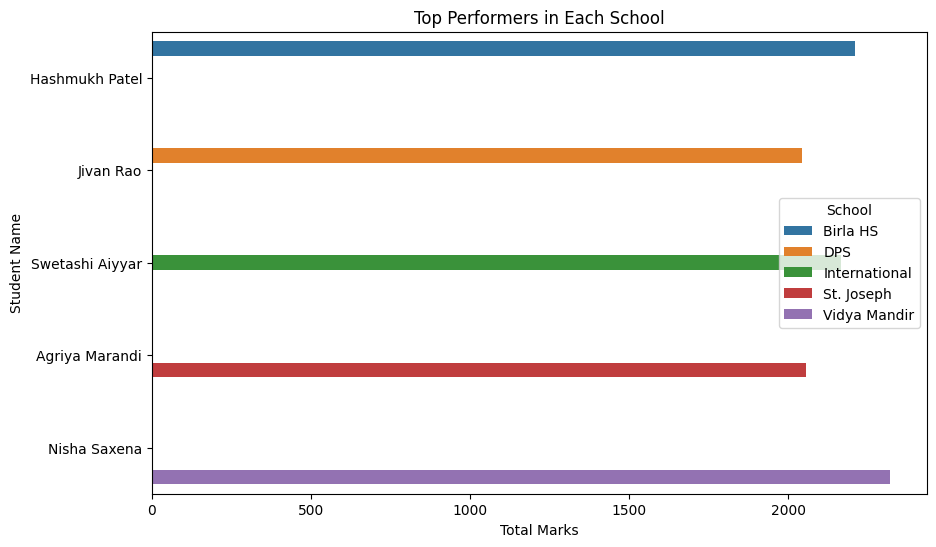

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Total Marks", y="Student Name", hue="School", data=top_performers)
plt.title("Top Performers in Each School")
plt.show()


# Ranking Students (2020)

In [6]:
df_2020 = df_all_years[df_all_years["year"] == 2020].copy()
df_2020["Rank"] = df_2020.groupby("School")["Total Marks"].rank(ascending = False, method = "dense")

rank_10 = df_2020[df_2020["Rank"] == 10].sort_values(by = "Total Marks", ascending = False)
rank_10 = rank_10.reset_index(drop=True)
display(rank_10)

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education,School,year,Total Marks,Rank
0,1012,Ganesh Sekhar,57,58,59,91,52,62,94,34,26,82,90,Vidya Mandir,2020,705,10.0
1,4017,Derek Pinto,43,84,78,64,51,53,45,58,71,75,51,Birla HS,2020,673,10.0
2,5008,Atin Choudhari,78,34,73,54,78,73,25,30,45,85,72,International,2020,647,10.0
3,2009,Rituraj Khanna,59,53,85,87,31,66,65,68,20,25,67,St. Joseph,2020,626,10.0
4,3014,Michel Dsuza,64,73,42,71,86,72,39,58,33,39,37,DPS,2020,614,10.0


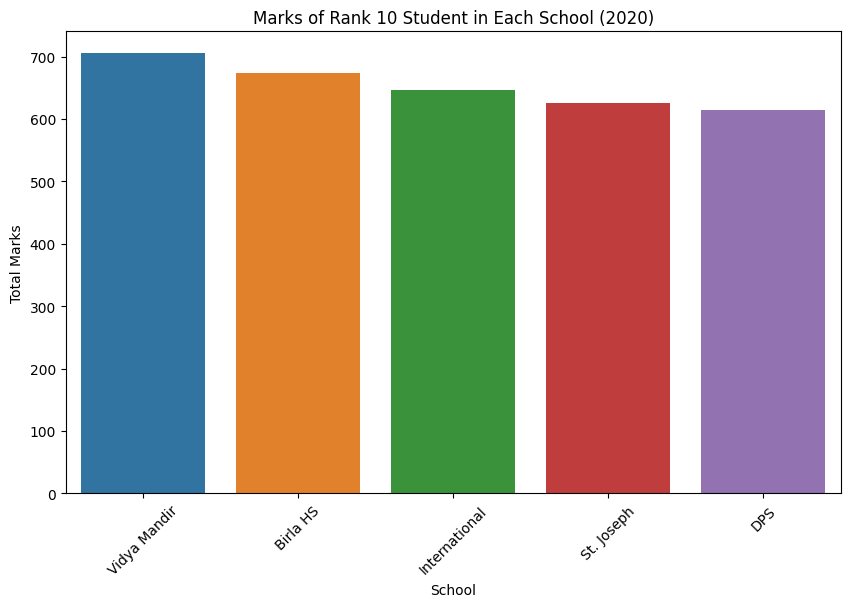

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x="School", y="Total Marks", data=rank_10)
plt.title("Marks of Rank 10 Student in Each School (2020)")
plt.xticks(rotation=45)
plt.show()


# Students With Highest Improvements

In [8]:
subjects = df_all_years.columns[2:-4]
df_improvement = df_all_years.groupby(["Student Name", "School"])[subjects].diff().dropna()

df_improvement[["Student Name", "School"]] = df_all_years[["Student Name", "School"]]

df_improvement["Total Improvement"] = df_improvement.sum(axis = 1)
top_improvers = df_improvement.groupby("Student Name")["Total Improvement"].sum().reset_index().nlargest(10, "Total Improvement")
print(top_improvers)


         Student Name  Total Improvement
26    Devanshu Mishra              246.0
4        Albert Pinto              201.0
90     Sonal Tripathi              196.0
67       Nitin Deewan              187.0
68       Piyush Pande              120.0
17   Ayansh Mukherjee              117.0
91    Subhajeet Dutta              115.0
57      Mitushi Ghosh              114.0
99    Yatindra Sharma              107.0
95  Suyash Chaturvedi               91.0


C:\Users\musta\AppData\Local\Temp\ipykernel_46996\4293099826.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_improvement["Total Improvement"] = df_improvement.sum(axis = 1)


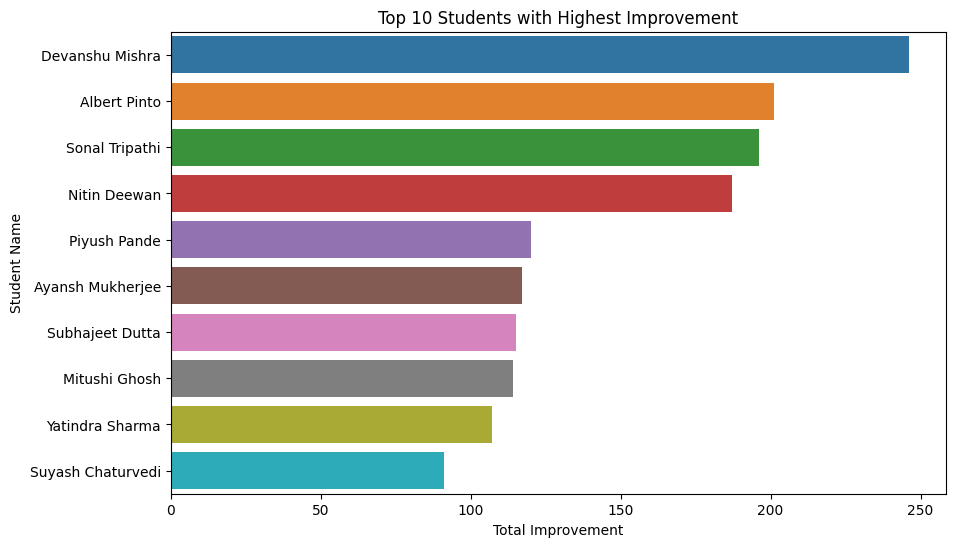

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Total Improvement", y="Student Name", data=top_improvers)
plt.title("Top 10 Students with Highest Improvement")
plt.show()


# Best School for Each Stream

In [17]:
stream_subjects = {
    "Arts": ["Hindi", "English", "History", "Geography", "Civics"],
    "Science": ["Mathematics", "Physics", "Chemistry", "Biology", "Computer Science"],
    "Commerce": ["Hindi", "English", "Mathematics", "Physical Education", "Computer Science"]
}

stream_best = {}
for stream, subjects in stream_subjects.items():
    df_stream = df_all_years.groupby("School")[subjects].sum().sum(axis = 1).reset_index()
    best_school = df_stream.nlargest(1, 0)
    stream_best[stream] = best_school.iloc[0,0]
print(stream_best)

{'Arts': 'Birla HS', 'Science': 'International', 'Commerce': 'Vidya Mandir'}


# Performance based Categorisation

In [11]:
def categorize(marks):
    if marks <= 20: return "Very Poor"
    elif marks <= 40: return "Poor"
    elif marks <= 60: return "Average"
    elif marks <= 80: return "Good"
    else: return "Very Good"

df_all_years["Category"] = df_all_years["Total Marks"]/len(subjects)
df_all_years["Category"] = df_all_years["Category"].apply(categorize)

category_counts = df_all_years.groupby(["School", "Category"]).size().unstack(fill_value =0)

print(category_counts)

Category       Very Good
School                  
Birla HS              60
DPS                   60
International         60
St. Joseph            60
Vidya Mandir          60


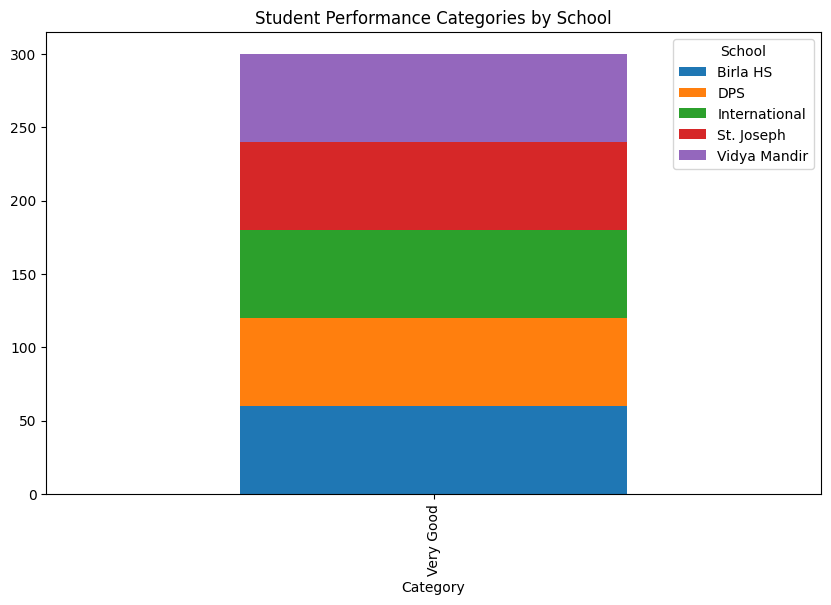

In [12]:
category_counts.T.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Student Performance Categories by School")
plt.show()


# Best School per Year

In [13]:
best_schools_yearly = df_all_years[df_all_years["Category"].isin(["Good", "Very Good"])].groupby(["year", "School"]).size().reset_index()
best_schools_yearly = best_schools_yearly.loc[best_schools_yearly.groupby("year")[0].idxmax()]
print(best_schools_yearly)


    year    School   0
0   2019  Birla HS  20
5   2020  Birla HS  20
10  2021  Birla HS  20


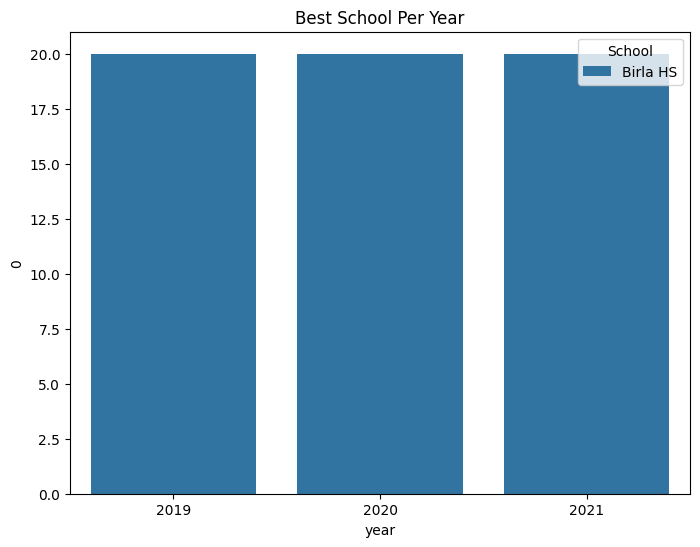

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x="year", y=0, hue="School", data=best_schools_yearly)
plt.title("Best School Per Year")
plt.show()


# Fastest Growing School

In [15]:
school_growth = df_all_years.groupby(["year", "School"])["Total Marks"].sum().unstack().pct_change().dropna().mean().reset_index()
fastest_growing = school_growth.nlargest(1, 0)
print(fastest_growing)


         School         0
4  Vidya Mandir  0.010212


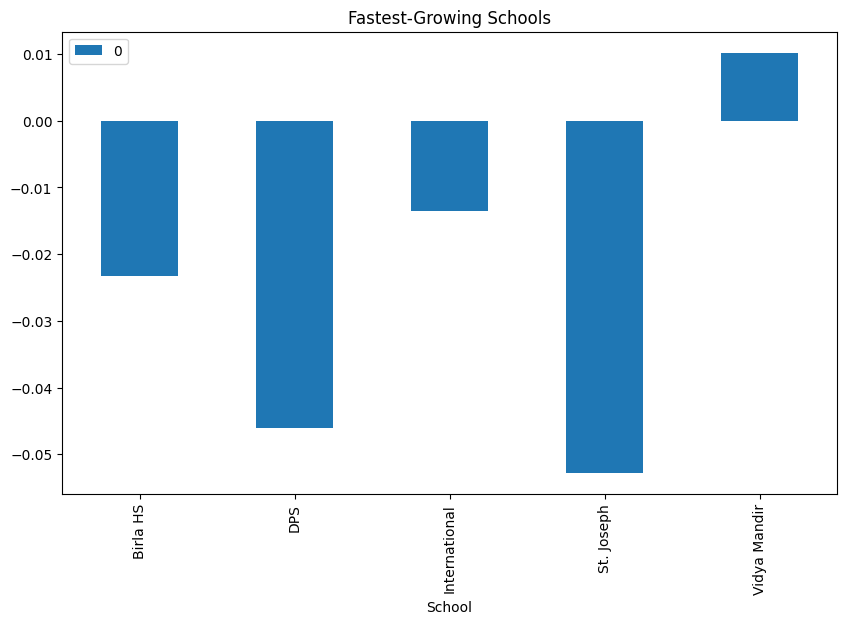

In [16]:
school_growth.plot(x="School", y=0, kind="bar", figsize=(10, 6))
plt.title("Fastest-Growing Schools")
plt.show()
